# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.
A simple linear regression model attempts to find the linear relationship between one independent variable and the dependent variable.
- What type of machine learning is linear regression? Supervised machine learning.
- What is a “line of best fit” using the OLS method? It is the line that best fits the data points while minimizing the distance between actual and predicted scores.
- What is the difference between correlation and regression?
Correlation helps us understand the linear relationship between two variables while regression helps in predicting the value of the dependent variable based on the value of the independent variable assuming a mathematical relationship between the two. Regression looks at the cause and effect and is a one way relationship while correlation is a two way relationship.
- Describe a scenario when you would use linear regression and why you would use it. 
When we are trying to predict the relation between minutes of excercise and sugar levels.

### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity: This assumes that the dependent variable should be linearly related to the independent variable(s).
- Normality: Assumes that the variables are normally distributed.
- Homoscedasticity:Assumes that the variance of error tems will be constant and the spread of residuals will be constant.
- No multicollinearity: Assumes that there is no correlation between the independent variables.
- No endogeneity:Assumes that the relationship between independent and dependent variable cannot be interpreted casually.
- No autocorrelation: Assumes that the error terms are independent of each other.

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0). It is the constant value that the dependent variable will take even if the slope of the line b0=0.
- Coefficient of Independent Variable (B1). It shows how much the value of the dependent variable will change for every unit change in the independent variable.
- Standard Error
- T-Statistic
- P-Value of T-Statistic (from the independent variable)


### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared
- Adjusted R-squared


# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [1]:
# make necessary imports
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# load data
house_data = pd.read_csv("house_data.csv")
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,1,3,7.0,1180.0,0,1955.0,98178.0,47.5112,-122.257,1340
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,1,3,7.0,2170.0,400,1951.0,98125.0,47.7210,-122.319,1690
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,1,3,6.0,770.0,0,1933.0,98028.0,47.7379,-122.233,2720
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,1,5,7.0,1050.0,910,1965.0,98136.0,47.5208,-122.393,1360
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,1,3,8.0,1680.0,0,1987.0,98074.0,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20451,2997800021,2015-02-19,475000.0,3,2.50,1310,1294.0,2.0,0,1,3,8.0,1180.0,130,2008.0,98116.0,47.5773,-122.409,1330
20452,263000018,2014-05-21,360000.0,3,2.50,1530,1131.0,3.0,0,1,3,8.0,1530.0,0,2009.0,98103.0,47.6993,-122.346,1530
20453,6600060120,2015-02-23,400000.0,4,2.50,2310,5813.0,2.0,0,1,3,8.0,2310.0,0,2014.0,98146.0,47.5107,-122.362,1830
20454,291310100,2015-01-16,400000.0,3,2.50,1600,2388.0,2.0,0,1,3,8.0,1600.0,0,2004.0,98027.0,47.5345,-122.069,1410


### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

In [3]:
# explore data below (you will need to make new cells)
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20456 entries, 0 to 20455
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20456 non-null  int64  
 1   date             20456 non-null  object 
 2   price            20456 non-null  float64
 3   bedrooms         20456 non-null  int64  
 4   bathrooms        20456 non-null  float64
 5   sqft_living      20456 non-null  int64  
 6   sqft_lot         20456 non-null  float64
 7   floors           20456 non-null  float64
 8   waterfront       20456 non-null  int64  
 9   view             20456 non-null  int64  
 10  house_condition  20456 non-null  int64  
 11  grade            20456 non-null  float64
 12  sqft_above       20456 non-null  float64
 13  sqft_basement    20456 non-null  int64  
 14  year_built       20456 non-null  float64
 15  zipcode          20452 non-null  float64
 16  lat              20456 non-null  float64
 17  long        

In [4]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15
count,2.045600e+04,2.045600e+04,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20452.000000,20456.000000,20456.000000,20456.000000
mean,4.634802e+09,4.863355e+05,3.310422,2.032062,1942.120258,10302.509875,1.473455,0.004155,1.179165,3.411322,7.514241,1679.184542,262.887808,1969.985041,95297.064395,47.559194,-122.219543,1902.208594
std,2.877504e+09,2.398423e+05,0.855849,0.689049,724.345438,12700.282036,0.537955,0.064329,0.661116,0.652286,1.026879,683.115368,390.859372,29.355600,15428.241686,0.139330,0.138576,585.143495
min,1.000102e+06,3.209000e+03,1.000000,0.000000,370.000000,520.000000,1.000000,0.000000,1.000000,1.000000,3.000000,300.000000,0.000000,1900.000000,9801.000000,47.155900,-122.512000,399.000000
25%,2.161850e+09,3.120000e+05,3.000000,1.500000,1390.000000,5000.000000,1.000000,0.000000,1.000000,3.000000,7.000000,1170.000000,0.000000,1950.750000,98032.000000,47.467200,-122.332000,1460.000000
50%,3.992700e+09,4.350000e+05,3.000000,2.000000,1840.000000,7412.000000,1.000000,0.000000,1.000000,3.000000,7.000000,1500.000000,0.000000,1972.000000,98072.000000,47.569650,-122.244500,1790.000000
75%,7.387500e+09,6.020000e+05,4.000000,2.500000,2410.000000,10022.250000,2.000000,0.000000,1.000000,4.000000,8.000000,2080.000000,520.000000,1995.000000,98118.000000,47.679400,-122.134000,2260.000000
max,9.900000e+09,1.640000e+06,6.000000,4.250000,4600.000000,133729.000000,3.500000,1.000000,5.000000,5.000000,12.000000,3960.000000,1540.000000,2050.000000,98199.000000,47.777600,-121.315000,3790.000000


In [6]:
sns.pairplot(house_data);

In [7]:
house = house_data[["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "house_condition", "grade", "year_built"]].copy()

In [8]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,year_built
count,2.045600e+04,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000
mean,4.863355e+05,3.310422,2.032062,1942.120258,10302.509875,1.473455,0.004155,1.179165,3.411322,7.514241,1969.985041
std,2.398423e+05,0.855849,0.689049,724.345438,12700.282036,0.537955,0.064329,0.661116,0.652286,1.026879,29.355600
min,3.209000e+03,1.000000,0.000000,370.000000,520.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1900.000000
25%,3.120000e+05,3.000000,1.500000,1390.000000,5000.000000,1.000000,0.000000,1.000000,3.000000,7.000000,1950.750000
50%,4.350000e+05,3.000000,2.000000,1840.000000,7412.000000,1.000000,0.000000,1.000000,3.000000,7.000000,1972.000000
75%,6.020000e+05,4.000000,2.500000,2410.000000,10022.250000,2.000000,0.000000,1.000000,4.000000,8.000000,1995.000000
max,1.640000e+06,6.000000,4.250000,4600.000000,133729.000000,3.500000,1.000000,5.000000,5.000000,12.000000,2050.000000


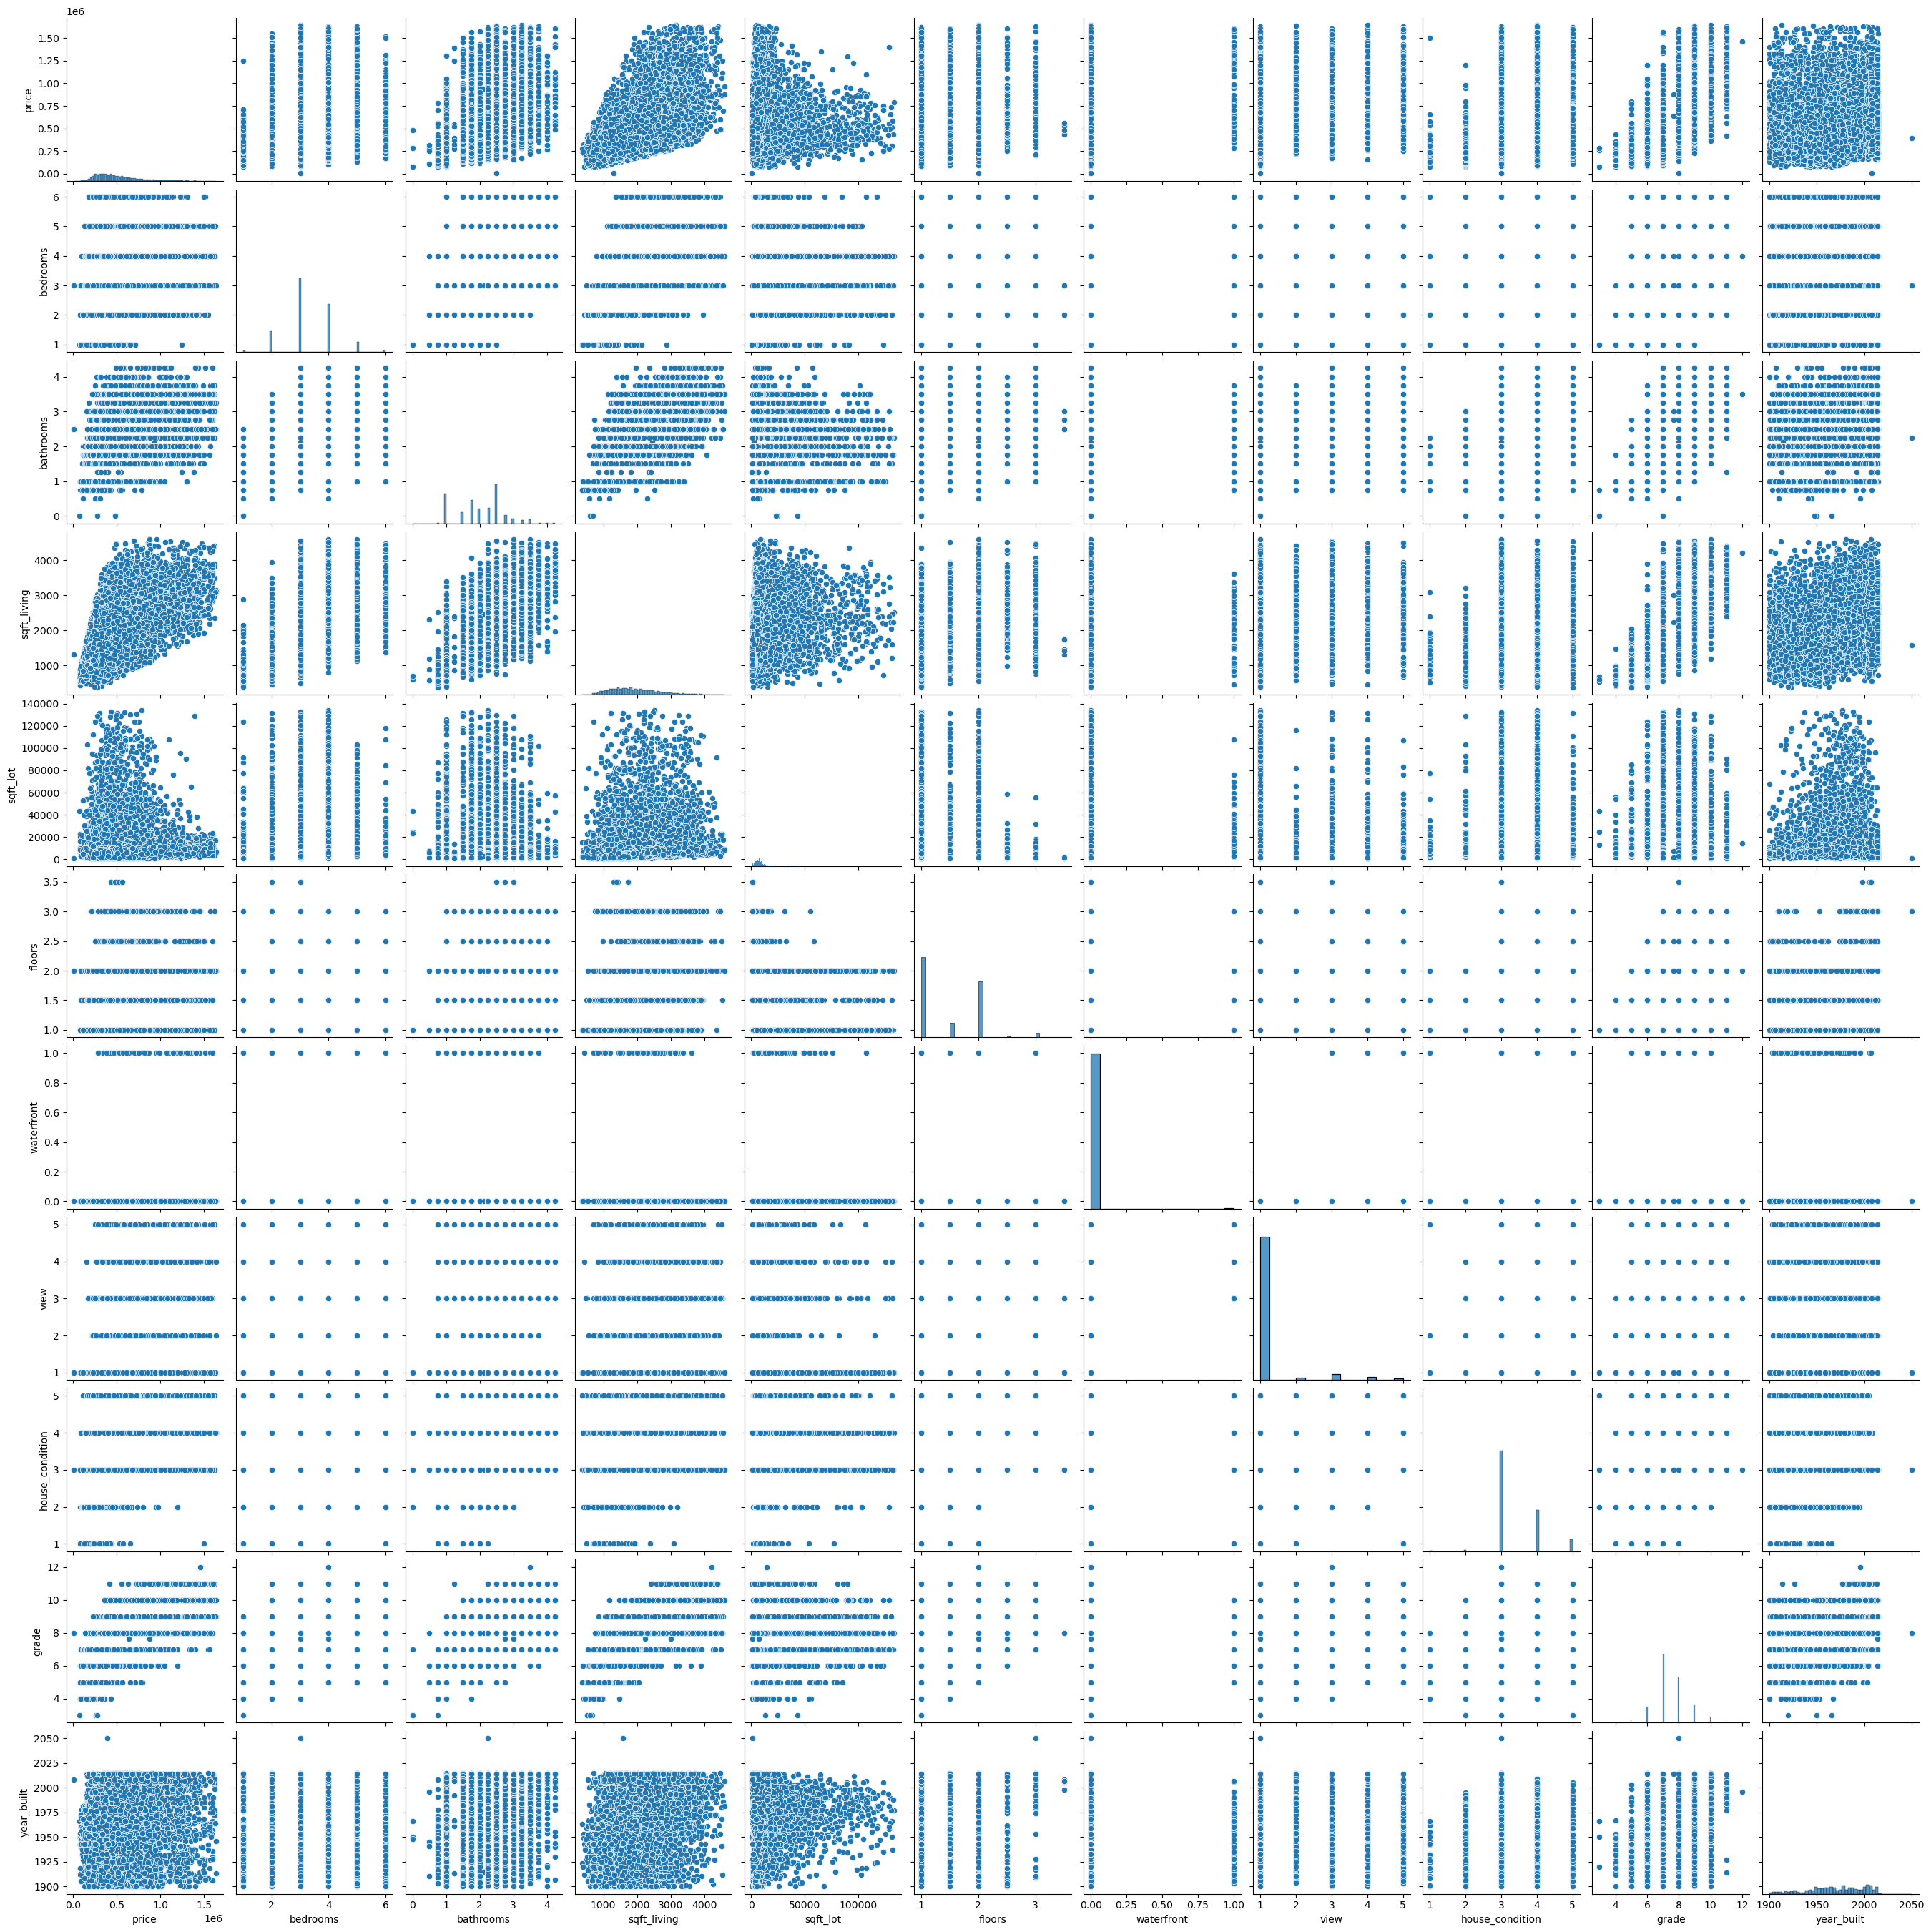

In [34]:
sns.pairplot(house);

In [13]:
from scipy.stats import pearsonr, spearmanr
house.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,year_built
price,1.000000,0.285851,0.441803,0.613010,0.067206,0.269991,0.106203,0.296863,0.061239,0.626245,0.019607
bedrooms,0.285851,1.000000,0.487899,0.601646,0.071999,0.164007,-0.038525,0.032773,0.028820,0.329490,0.164924
bathrooms,0.441803,0.487899,1.000000,0.710514,0.042485,0.514539,0.002785,0.103642,-0.121418,0.614198,0.537778
sqft_living,0.613010,0.601646,0.710514,1.000000,0.196979,0.357559,0.016142,0.178901,-0.051737,0.701670,0.335907
sqft_lot,0.067206,0.071999,0.042485,0.196979,1.000000,-0.103041,0.059058,0.059335,0.035667,0.103452,0.029347
floors,0.269991,0.164007,0.514539,0.357559,-0.103041,1.000000,0.002481,0.006431,-0.260133,0.465698,0.498247
waterfront,0.106203,-0.038525,0.002785,0.016142,0.059058,0.002481,1.000000,0.345743,0.014025,0.008355,-0.039317
view,0.296863,0.032773,0.103642,0.178901,0.059335,0.006431,0.345743,1.000000,0.039282,0.160320,-0.077140
house_condition,0.061239,0.028820,-0.121418,-0.051737,0.035667,-0.260133,0.014025,0.039282,1.000000,-0.146106,-0.346117
grade,0.626245,0.329490,0.614198,0.701670,0.103452,0.465698,0.008355,0.160320,-0.146106,1.000000,0.467357


There is a high correlation between price and sqft_living, grade, view, floors bedrooms and bathrooms

### Step 3: Determine independent and dependent variable

In [18]:
# set X 
x1 = house_data["sqft_living"]

# set Y 
y = house_data["price"]

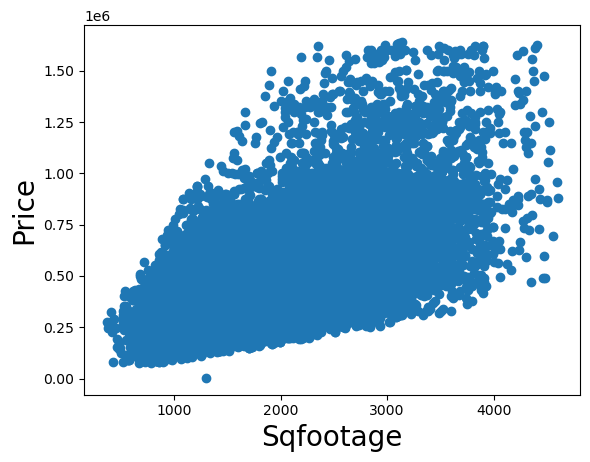

In [19]:
# visualize relationship between X and Y
plt.scatter(x1,y)
plt.xlabel("Sqfootage", fontsize = 20)
plt.ylabel("Price", fontsize =20)
plt.show()

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [21]:
# fit model to X and Y variables (you will need to make more cells)
x=sm.add_constant(x1)
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:24:08   Log-Likelihood:            -2.7761e+05
No. Observations:               20456   AIC:                         5.552e+05
Df Residuals:                   20454   BIC:                         5.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.213e+04   3791.541     24.298      0.000    8.47e+04    9.96e+04
sqft_living   202.9775      1.829    110.966      0.000     199.392     206.563
==============================================================================
Omnibus:                     3900.816   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9054.676
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       5.434   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

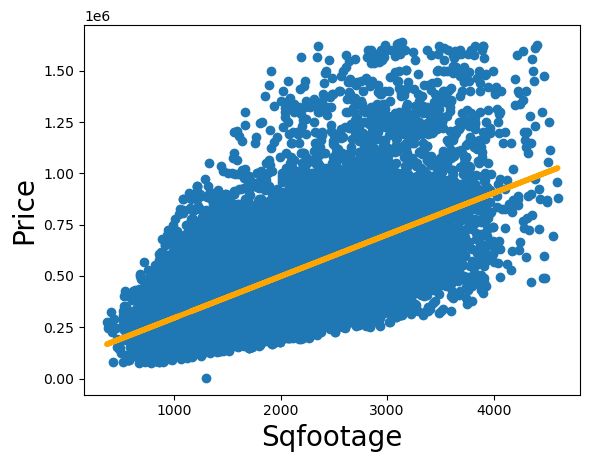

In [23]:
plt.scatter(x1,y)
yhat=202.9775*x1 + 92130
fig = plt.plot(x1, yhat, lw=4, c="orange", label="regression line")
plt.xlabel("Sqfootage", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.show()

### Step 5: Interpret Model Summary 

In [9]:
# print out and interpret model summary // terms identified below

Interpret the following from your model:

- R-squared= 0.376. It is the equal to explained variability/total variability. It is a relative measure and takes values from 0 to 1. Here 37.6% of the variability in price is explained by sqfeet_living.
- Coefficient of independent variable = 202.9775. B1 =202.9775. It tells us how much the dependent variable (Price) changes for a 1 sq feet shift in the independent variable(sqfeet_living)
- P-value of T-statistic=0.00. We can conclude that Sqfeet_living is a significant variable to predict price because the p value is <0.05
- P-value of F-statistic=0.00. It tells us the probability of observing a r^2 value of 0.376 or higher if there was no association between sqfeet_living and price.

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [26]:
# predict new y values (dependent variables) by feeding model new independent variable values
#X =10000
#Price = 202.9775*10000 + 92130 = $2,121,905
#X= 500
#Price = 202.9775*500 + 92130 = $193,619

# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [17]:
# Pick another independent variable. Be sure to avoid multicollinearity. 
 #view

In [19]:
house.view.unique()

array([1, 4, 3, 5, 2])

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [15]:
# fit new regression model (you will need to make more cells)
y = house_data["price"]
x1 = house_data[["sqft_living", "view"]]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     7165.
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:43:32   Log-Likelihood:            -2.7700e+05
No. Observations:               20456   AIC:                         5.540e+05
Df Residuals:                   20453   BIC:                         5.540e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.165e+04   4055.559      7.804      0.000    2.37e+04    3.96e+04
sqft_living   191.5220      1.805    106.135      0.000     187.985     195.059
view         7.016e+04   1977.099     35.485      0.000    6.63e+04     7.4e+04
==============================================================================
Omnibus:                     3464.013   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7724.309
Skew:                           0.987   Prob(JB):                         0.00
Kurtosis:                       5.274   Cond. No.                     6.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

# Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared: Explained variability/total variability. It is a relative measure and takes values from 0 to 1. Here 41.2% of the variability in price is explained by sqfeet_living.
- Adjusted R-squared: The adjusted r squared is adjusted for the number of independent variables in the model and it increases when the new independent variable improves the model. here the adjusted R squared = 41.2% which implies that 41.2% of the variability in price is explained by the model that has independent variables of sqft_living and view.
- Coefficient of independent variables: sqft_living = 191.522. It tells us that for evert 1 sqft increase in living space, the price of the house increases by $191.522. Similarly for view = 70160; for every one unit increase in view, the price rises by $70160.
- P-value of T-statistic: sqft_living = 0.000 and view =0.000.We can conclude that sqft_living and view are significant variables to predict price because the p value for both is <0.05
- P-value of F-statistic = 0.00. It tells us that probability of observing an adjusted R squared value of 0.412 or higher if there was no association between sqft_living, view, and price is =0.



If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [15]:
# predict new y values (dependent variables) by feeding model new independent variable values
#X1 =10000; x2 = 5
#Price = 191.522*10000 + 70160*5 + 31650= $2,297,670
#X1= 500; x2=1
#Price = 191.522*500 + 70160*1 + 31650 = $197,571

### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [20]:
# create new markdown cell and write down your observations

The simple regression model using sqft_living as the only independent variable  had an R squared of 37.6% indicating that sqft_living accounted for 37.6% of the variability of house prices. In the multiple regression model, adding view resulted in adjusted R squared of 41.2% indicating that these two variables account for 41.2% of the variability of house prices. The multiple regression model is a better fit to explain price variability as the adjusted R squared increased.

# Part 4 - Multivariate Time Series Analysis

In [17]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 